# MULTIVARIATE ADAPTIVE REGRESSION SPLINES (MARS):

1.Multivariate Adaptive Regression Splines (MARS) is a non-parametric regression method that builds multiple linear regression models across the range of predictor values. It does this by partitioning the data, and run a linear regression model on each different partition.

2.The MARS algorithm builds a model in two steps.

**1.Forward Stage:** First, it creates a collection of so-called basis functions (BF). In this procedure, the range of predictor values is partitioned in several groups. For each group, a separate linear regression is modeled, each with its own slope. The connections between the separate regression lines are called knots. The MARS algorithm automatically searches for the best spots to place the knots. Each knot has a pair of basis functions i.e it occurs in pairs such as max(0,x-c) & max(0,c-x)

**2.Backward Stage:** MARS estimates a least-squares model with its basis functions as independent variables. It fits a very large model, that is subsequently pruned (like tree-based models) to avoid overfitting by iteratively removing basis functions that contribute the least to model fit.



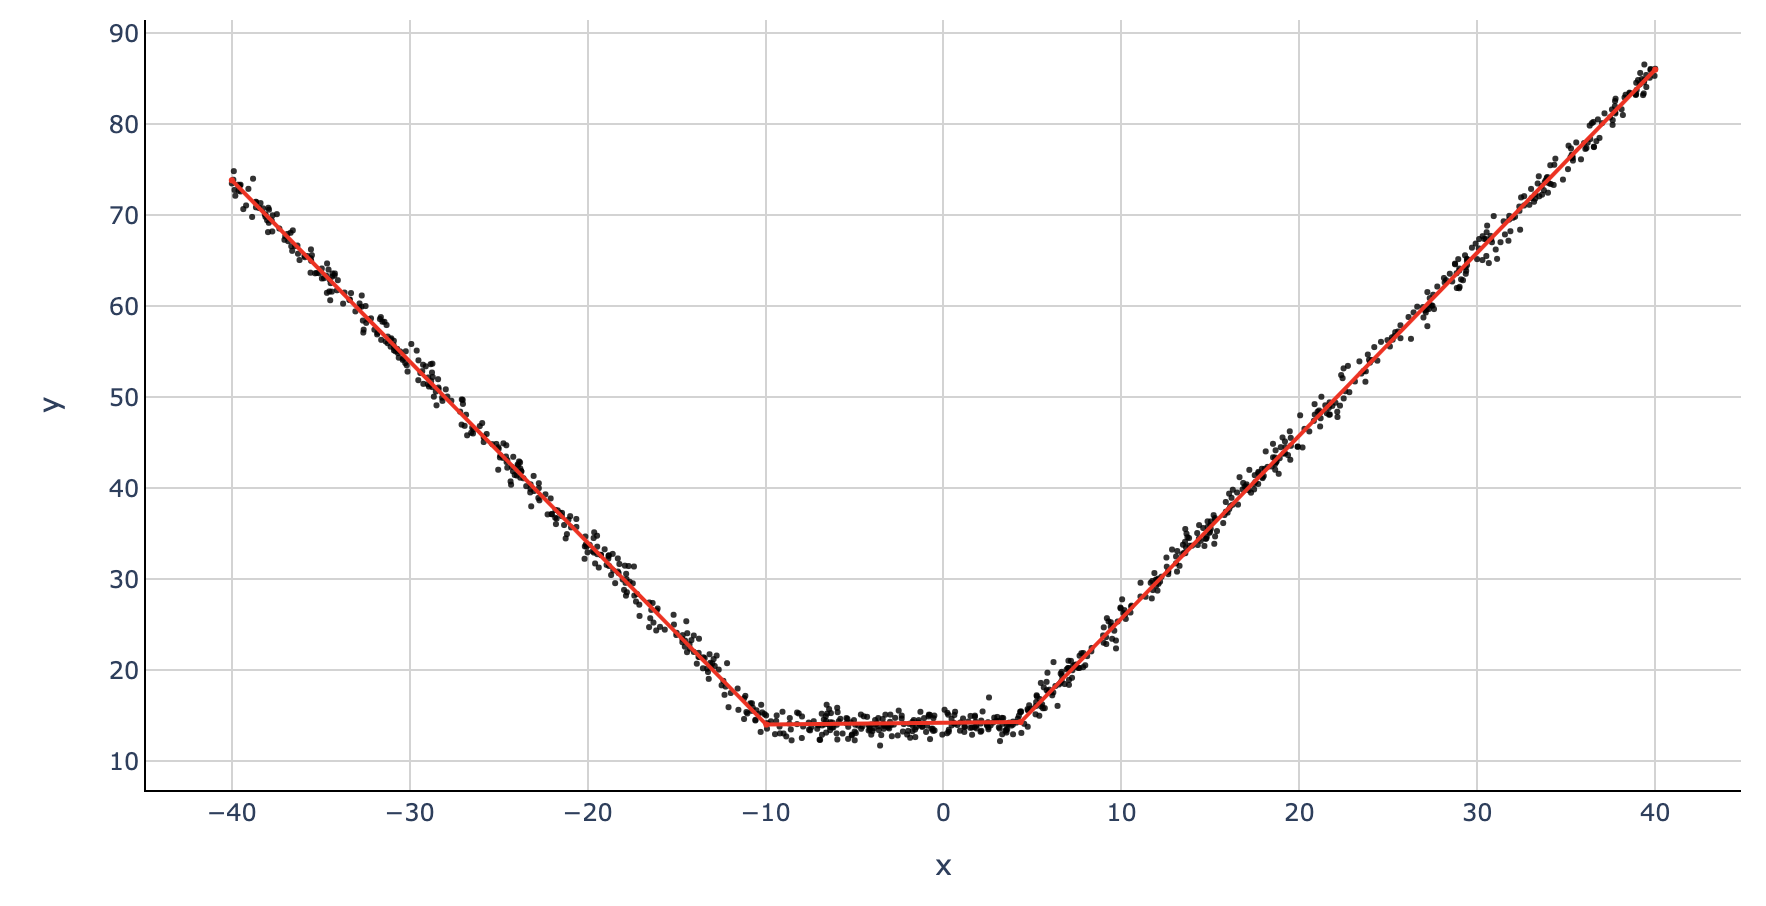

In [57]:
from IPython.display import Image
Image(filename = "mars_1.png")

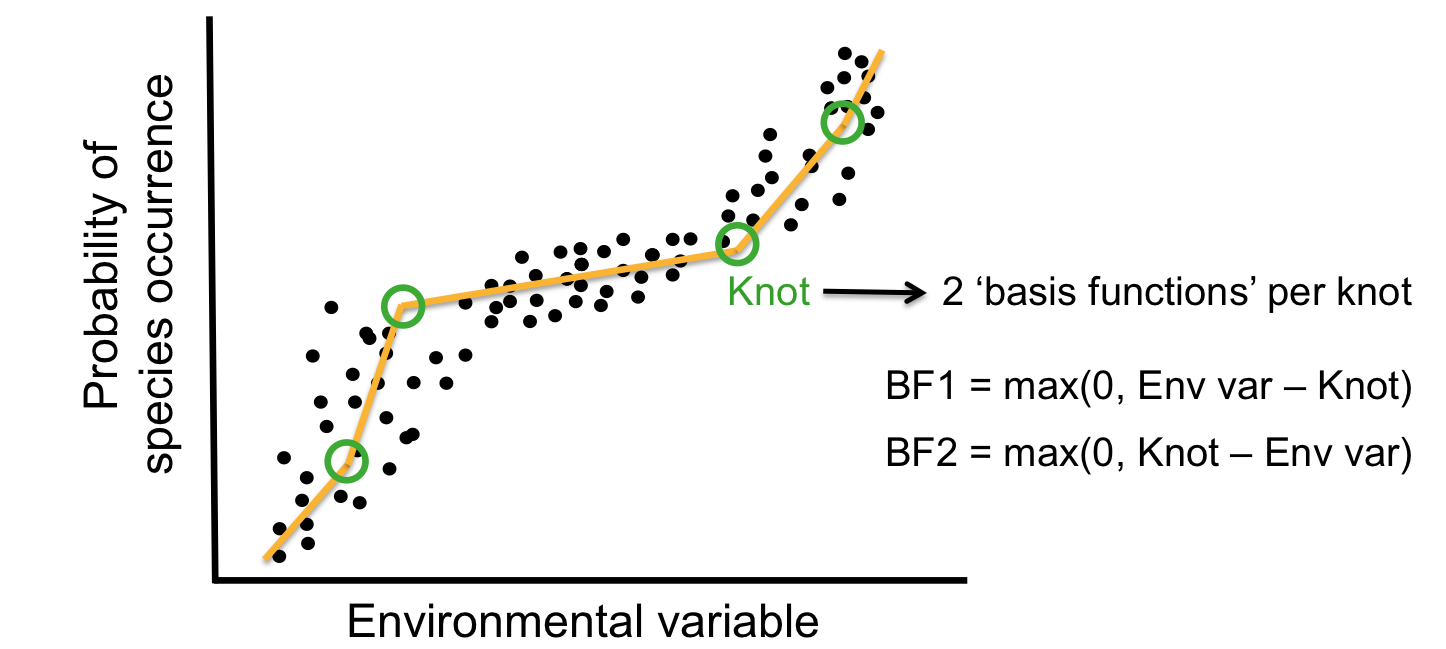

In [58]:
Image(filename = "MARS.png")

In [59]:
!pip install sklearn_contrib_py_earth‑0.1.0‑cp36‑cp36m‑win_amd64.whl


Processing c:\users\karndeep singh\desktop\sklearn_contrib_py_earth-0.1.0-cp36-cp36m-win_amd64.whl
sklearn-contrib-py-earth is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


In [60]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from pyearth import Earth
import warnings
warnings.filterwarnings("ignore")

# define dataset
X, y = make_regression(n_samples=10000, n_features=2, n_informative=15, noise=0.5, random_state=7)


# Linear Regression

In [61]:
lr = LinearRegression()
lr.fit(X, y)
print("Coefficient:",lr.coef_)
print("Intercept:",lr.intercept_)
print("\n")
print("Linear Regression Equation:", f"y = {lr.coef_[0]}* x0 + {lr.coef_[1]}* x1 + {lr.intercept_}")

Coefficient: [17.80321015 71.29656192]
Intercept: -0.0034215722227788903


Linear Regression Equation: y = 17.80321015074716* x0 + 71.29656191998494* x1 + -0.0034215722227788903


# Multivariate Adaptive Regression Splines

In [62]:
# define the model
model = Earth()
model.fit(X, y)
print(model.summary())
print("\n")
print("MARS Equation:", f"y = {model.coef_[0][1]}* x0 + {model.coef_[0][2]}* x1 + {model.coef_[0][0]}")



Earth Model
-------------------------------------
Basis Function  Pruned  Coefficient  
-------------------------------------
(Intercept)     No      -0.00342157  
x1              No      71.2966      
x0              No      17.8032      
-------------------------------------
MSE: 0.2480, GCV: 0.2483, RSQ: 1.0000, GRSQ: 1.0000


MARS Equation: y = 71.29656191998498* x0 + 17.803210150747205* x1 + -0.003421572222785079
